In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import dask.dataframe as dd
import plotly.express as px

#from ydata_profiling import ProfileReport
#%matplotlib inline
#/home/dorra/.local/bin/streamlit run main.py

In [8]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the filename
filename = "LogPtoblemP.csv"

# Combine the directory and filename to get the path
processed_data_path = os.path.abspath(os.path.join(current_directory, filename))

# Print the path
print("Processed Data Path:", processed_data_path)

Processed Data Path: /home/dorra/LogPtoblemP.csv


In [2]:
df_LogProblem=pd.read_csv(r'/home/dorra/LogProblemP.csv')
df_InfoUser=pd.read_csv(r'/home/dorra/InfoUserP.csv')
df_InfoContent=pd.read_csv(r'/home/dorra/InfoContentP.csv')

In [3]:
correctness_counts = df_LogProblem['is_correct'].value_counts()

fig = go.Figure(data=[go.Bar(x=correctness_counts.index, y=correctness_counts.values,  marker=dict(color='orange'))])
fig.update_layout(title='Distribution of Answer Correctness Across All Exercises',
                  xaxis_title='Is Correct',
                  yaxis_title='Count')
fig.show()

In [4]:
df_LogProblem.describe()

,problem_number,exercise_problem_repeat_session,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
count,998040.00000,998040.000000,998040.000000,998040.000000,998040.000000,998040.000000
mean,10.14156,1.249345,43.947720,1.866862,0.537792,0.403005
std,14.81435,0.825791,96.435884,3.860085,1.174253,0.858148
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.00000,1.000000,10.000000,1.000000,0.000000,0.000000
50%,6.00000,1.000000,20.000000,1.000000,0.000000,0.000000
75%,11.00000,1.000000,45.000000,2.000000,0.000000,0.000000
max,310.00000,24.000000,1800.000000,798.000000,52.000000,4.000000


In [13]:
level_counts = df_LogProblem['level'].value_counts()

fig = go.Figure(data=[go.Bar(x=level_counts.index, y=level_counts.values)])
fig.update_layout(title='Distribution of Proficiency Levels Across All Exercises',
                  xaxis_title='Proficiency Level',
                  yaxis_title='Count')
fig.show()

In [18]:
df_InfoUser.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,5.364298e+04,9.101000,5.517400,0.868600,0.107800,0.901600,0.03660
std,8.824188e+04,15.350138,1.997322,1.300797,2.318891,1.858335,0.26091
min,1.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,7.050750e+03,1.000000,4.000000,0.000000,0.000000,0.000000,0.00000
50%,2.154000e+04,3.000000,5.000000,1.000000,0.000000,1.000000,0.00000
75%,6.296850e+04,11.000000,7.000000,1.000000,0.000000,1.000000,0.00000
max,1.391332e+06,225.000000,12.000000,40.000000,109.000000,52.000000,7.00000


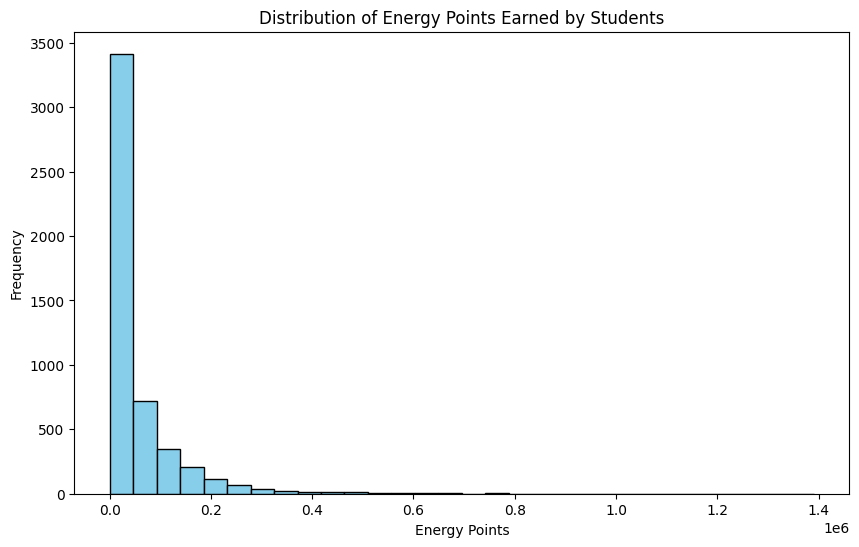

In [24]:
energy_points = df_InfoUser['points']

plt.figure(figsize=(10, 6))
plt.hist(energy_points, bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Energy Points')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Points Earned by Students')
plt.show()


In [27]:
energy_points_stats = df_InfoUser.groupby('user_grade')['points'].agg(['mean', 'max', 'min'])

# Reset the index to make 'user_grade' a column again
energy_points_stats = energy_points_stats.reset_index()

# Display the table
print(energy_points_stats)

    user_grade          mean      max   min
0            1  46553.754717   540869    75
1            2  41504.609524   295196  2184
2            3  37199.950437   658839    43
3            4  62343.289474  1202797    75
4            5  74201.775142   757851    57
5            6  58778.608696   780478    75
6            7  47352.928645  1391332    17
7            8  32191.356083   366454    59
8            9  34480.125000   379370   525
9           10  51173.630137   413583   229
10          11  50382.239130   253225   252
11          12  31461.571429   153719    75


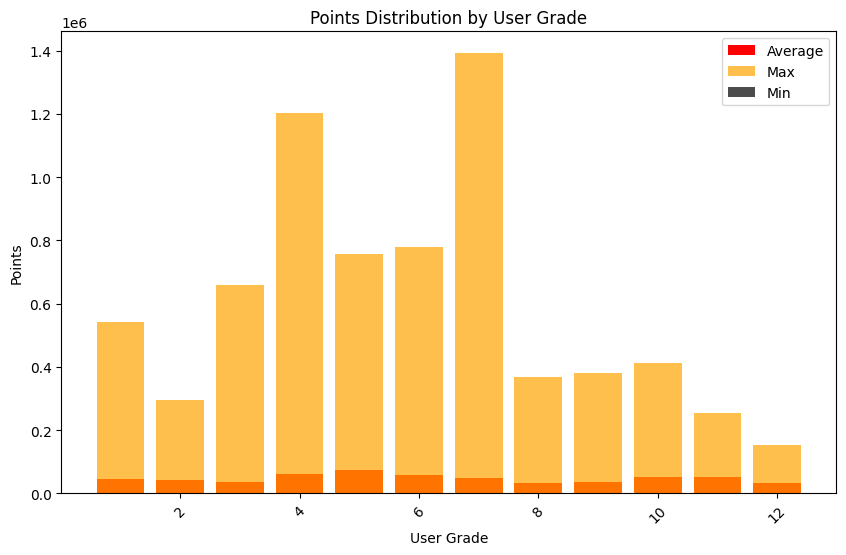

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(energy_points_stats['user_grade'], energy_points_stats['mean'], label='Average', color='red')
plt.bar(energy_points_stats['user_grade'], energy_points_stats['max'], label='Max', color='orange', alpha=0.7)
plt.bar(energy_points_stats['user_grade'], energy_points_stats['min'], label='Min', color='black', alpha=0.7)
plt.xlabel('User Grade')
plt.ylabel('Points')
plt.title('Points Distribution by User Grade')
plt.legend()
plt.xticks(rotation=45)
plt.show()

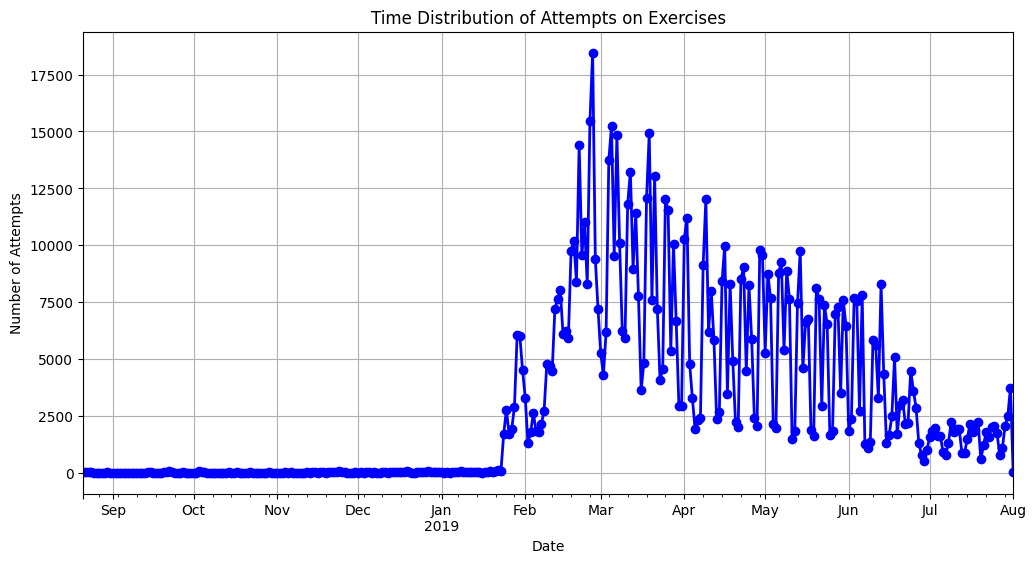

In [31]:
df_LogProblem['timestamp_TW'] = pd.to_datetime(df_LogProblem['timestamp_TW'])

# Group the attempts by time intervals (e.g., days) and count the number of attempts in each interval
time_intervals = df_LogProblem.set_index('timestamp_TW').resample('D').size()

# Create a line plot to visualize the time distribution of attempts
plt.figure(figsize=(12, 6))
time_intervals.plot(marker='o', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Number of Attempts')
plt.title('Time Distribution of Attempts on Exercises')
plt.grid(True)
plt.show()

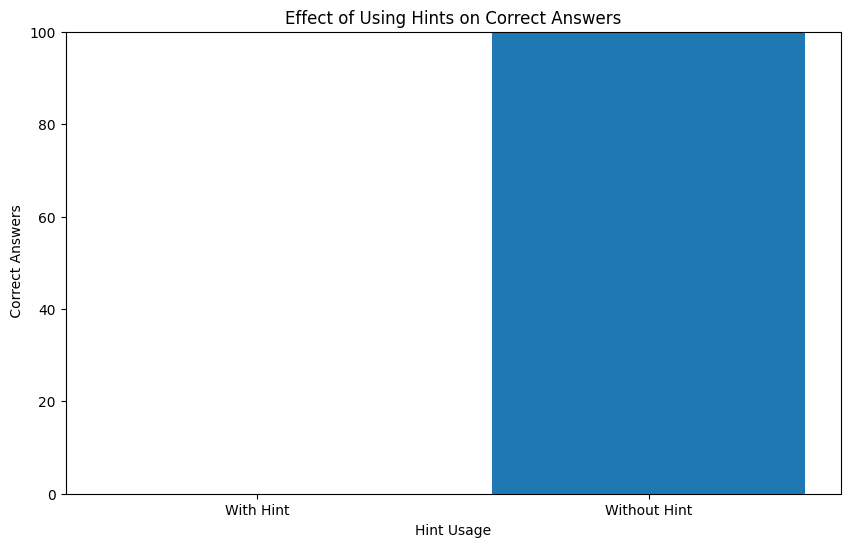

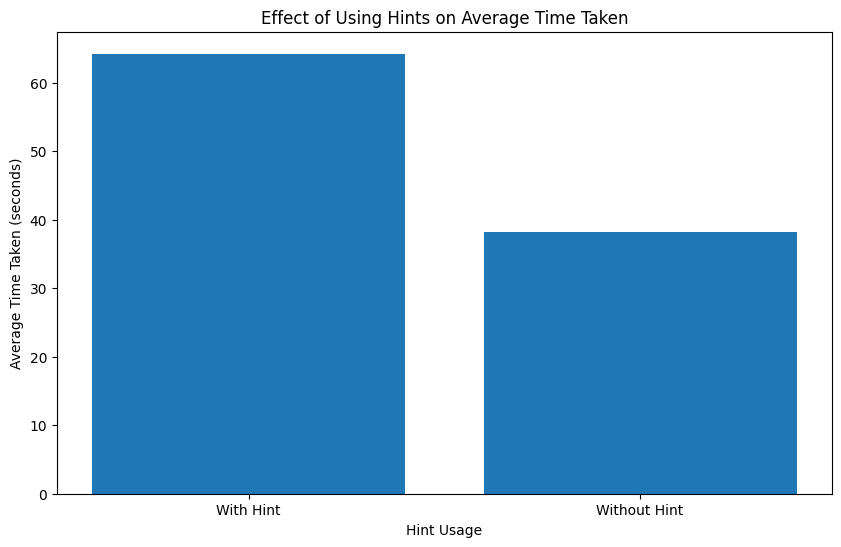

In [22]:
# Create Categories
df_LogProblem['hint_used'] = df_LogProblem['used_hint_cnt'] > 0
hint_users = df_LogProblem[df_LogProblem['hint_used'] == True]
no_hint_users = df_LogProblem[df_LogProblem['hint_used'] == False]

# Calculate the total number of unique users
total_users = df_LogProblem['uuid'].nunique()

# Performance Metrics
hint_correct_count = hint_users['is_correct'].sum()
no_hint_correct_count = no_hint_users['is_correct'].sum()

hint_avg_time_taken = hint_users['total_sec_taken'].mean()
no_hint_avg_time_taken = no_hint_users['total_sec_taken'].mean()

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(['With Hint', 'Without Hint'], [hint_correct_count, no_hint_correct_count])
plt.xlabel('Hint Usage')
plt.ylabel(' Correct Answers')
plt.title('Effect of Using Hints on Correct Answers')
plt.ylim(0, 100)  # Set y-axis limits to percentages (0-100)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(['With Hint', 'Without Hint'], [hint_avg_time_taken, no_hint_avg_time_taken])
plt.xlabel('Hint Usage')
plt.ylabel('Average Time Taken (seconds)')
plt.title('Effect of Using Hints on Average Time Taken')
plt.show()


In [34]:
df_InfoContent.describe()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
count,1326,1326,1326,1326,1326,1326,1326,1326,1326,1326
unique,1326,1316,1,4,1,3,1,10,42,171
top,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【一般】函數關係式,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,364ml6jwsO0pO5l86JBpC+KFYvYr7mn7S9gVuhoBnUE=
freq,1,2,1326,832,1326,784,1326,553,146,18


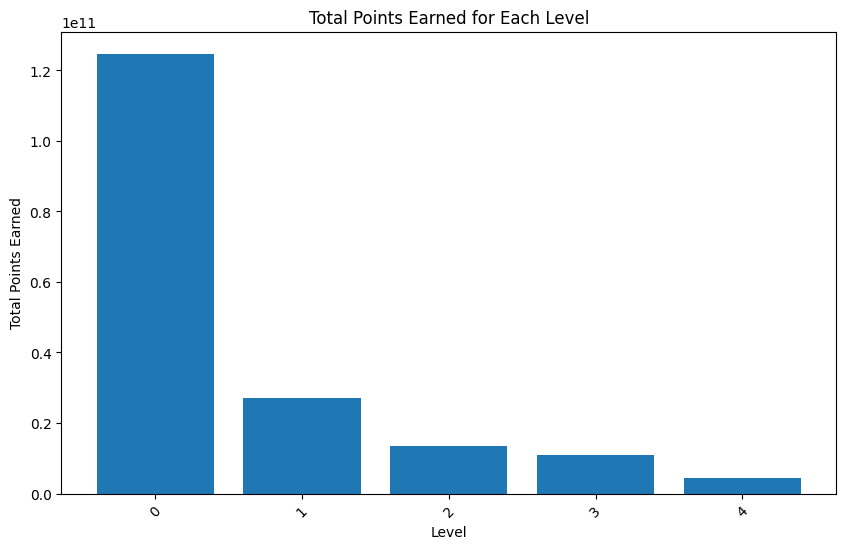

In [3]:
# Merge the dataframes on 'uuid' column
merged_data = df_LogProblem.merge(df_InfoUser[['uuid', 'points']], on='uuid', how='left')

# Group data by 'level' to calculate total points earned for each level
points_by_level = merged_data.groupby('level')['points'].sum().reset_index()

# Plot the total points earned for each level
plt.figure(figsize=(10, 6))
plt.bar(points_by_level['level'], points_by_level['points'])
plt.xlabel('Level')
plt.ylabel('Total Points Earned')
plt.title('Total Points Earned for Each Level')
plt.xticks(rotation=45)
plt.show()

In [3]:
grouped_data = df_LogProblem.groupby('level')['total_attempt_cnt'].mean()

# Create a bar plot
fig = go.Figure()

# Add bar plot trace
fig.add_trace(go.Bar(x=grouped_data.index, y=grouped_data, name='Average Total Attempt Count'))

# Update layout and axis labels
fig.update_layout(title='Relationship between Proficiency Level and Total Attempt Count',
                  xaxis_title='Proficiency Level',
                  yaxis_title='Average Total Attempt Count',
                  showlegend=False)

fig.show()

In [34]:
df_merged = df_LogProblem.merge(df_InfoContent[['ucid', 'difficulty']], on='ucid', how='left')

# Group data by difficulty level and level attended
grouped = df_merged.groupby(['difficulty', 'level']).size().reset_index(name='count')

# Create a stacked bar plot
fig = px.bar(grouped, x='difficulty', y='count', color='level',
             title='Levels Attended by Users for Each Category of Exercises',
             labels={'difficulty': 'Difficulty', 'count': 'Number of Exercises'},
             category_orders={'level': ['0', '1', '2', '3', '4']})

fig.update_layout(barmode='stack')
fig.show()

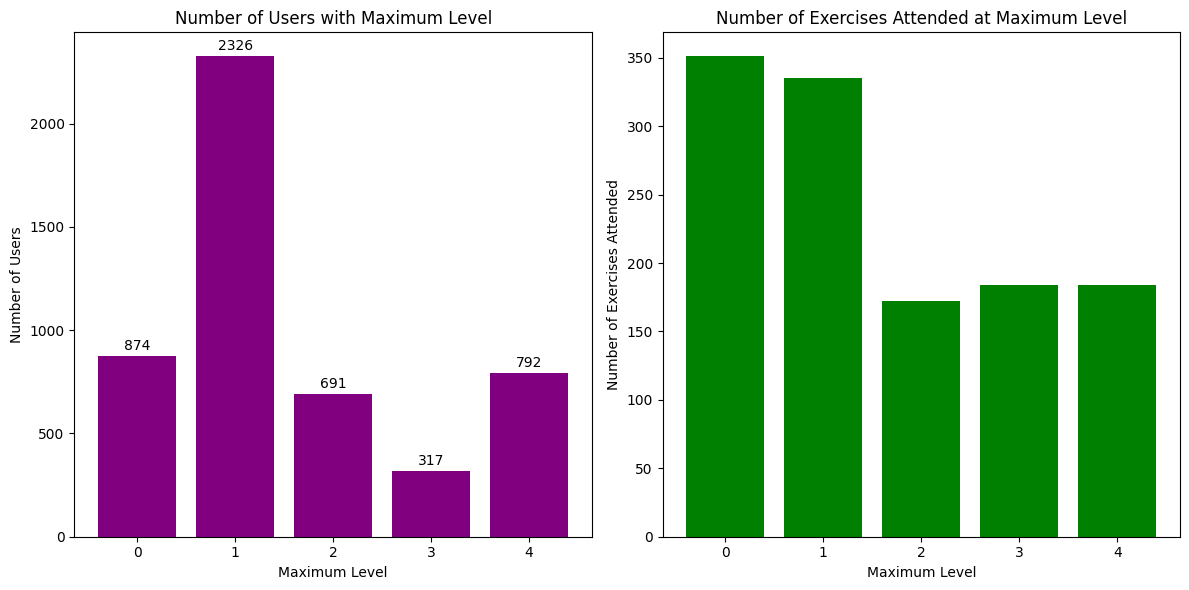

In [17]:
max_levels = df_LogProblem.groupby('uuid')['level'].max()
exercise_counts = df_LogProblem.groupby(['uuid', 'level'])['ucid'].nunique()

# Count the number of users for each maximum level
level_counts = max_levels.value_counts().sort_index()

# Create a bar plot for number of users with maximum level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(level_counts.index, level_counts.values, color='purple')  # Change bar color to purple
plt.xlabel('Maximum Level')
plt.ylabel('Number of Users')
plt.title('Number of Users with Maximum Level')
plt.xticks(range(5))  # Set x-axis ticks for levels 0 to 4

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 30, round(yval), ha='center', color='black', fontsize=10)

# Create a bar plot for number of exercises attended at maximum level
plt.subplot(1, 2, 2)
plt.bar(exercise_counts.index.get_level_values('level'), exercise_counts.values, color='green')
plt.xlabel('Maximum Level')
plt.ylabel('Number of Exercises Attended')
plt.title('Number of Exercises Attended at Maximum Level')
plt.xticks(range(5))  # Set x-axis ticks for levels 0 to 4

plt.tight_layout()
plt.show()

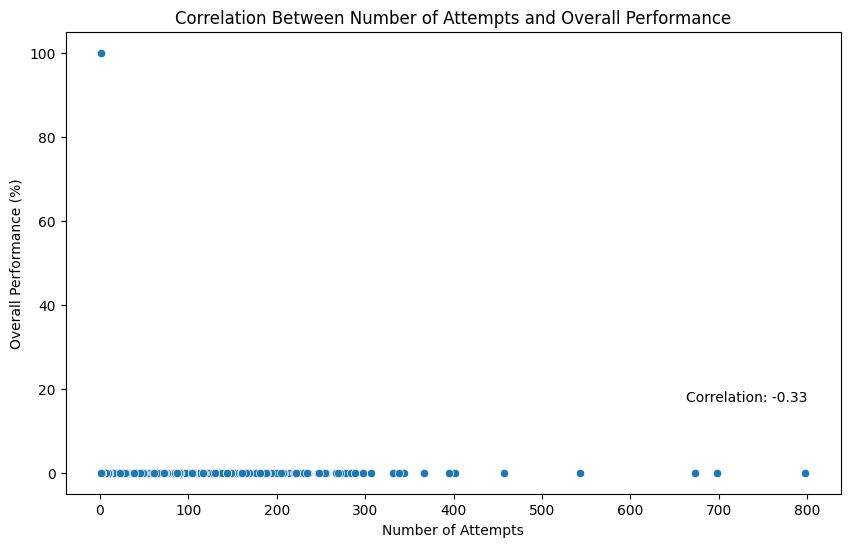

In [18]:
df_LogProblem['correct_attempts'] = df_LogProblem['is_correct']
df_LogProblem['total_attempts'] = df_LogProblem['total_attempt_cnt']
df_LogProblem['overall_performance'] = (df_LogProblem['correct_attempts'] / df_LogProblem['total_attempts']) * 100

# Calculate correlation between number of attempts and overall performance
correlation = df_LogProblem['total_attempts'].corr(df_LogProblem['overall_performance'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_LogProblem, x='total_attempts', y='overall_performance')
plt.title("Correlation Between Number of Attempts and Overall Performance")
plt.xlabel("Number of Attempts")
plt.ylabel("Overall Performance (%)")
plt.text(0.8, 0.2, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes)
plt.show()

INSIGHT :

A correlation of -0.33 suggests a weak negative correlation between the number of attempts made by a student and their overall performance. This means that, on average, as the number of attempts increases, the overall performance tends to slightly decrease.

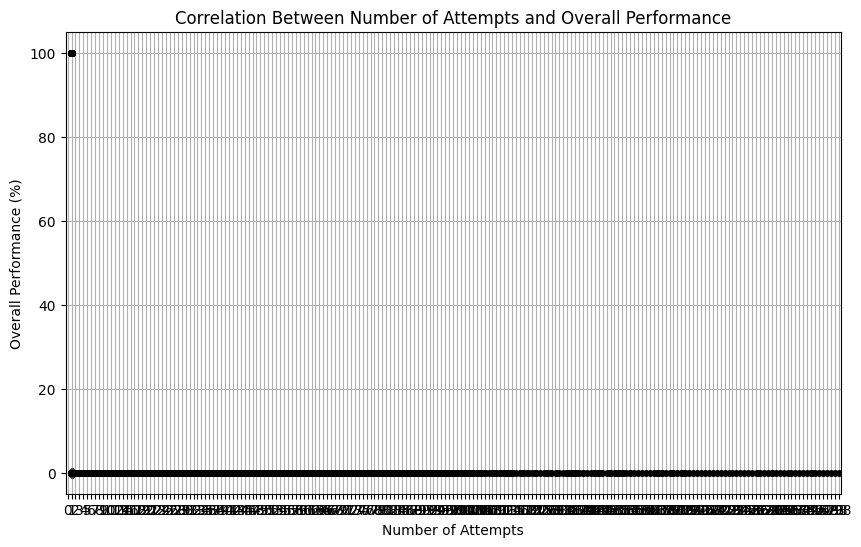

In [21]:
mean_performance = df_LogProblem.groupby('total_attempts')['overall_performance'].mean()

# Calculate the standard error of the mean overall performance for each number of attempts
sem_performance = df_LogProblem.groupby('total_attempts')['overall_performance'].sem()

# Create a line plot with error bars
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_LogProblem, x='total_attempts', y='overall_performance')
sns.stripplot(data=df_LogProblem, x='total_attempts', y='overall_performance', color='black', jitter=0.2)
plt.title("Correlation Between Number of Attempts and Overall Performance")
plt.xlabel("Number of Attempts")
plt.ylabel("Overall Performance (%)")
plt.grid(True)
plt.show()